In [ ]:
#This notebook is used to calculate the measurements of our scoring model   

In [1]:
# standard import of pandas
import pandas as pd
# additional import of the geopandas package
import geopandas as gpd
# import numpy
import numpy as np
# driver for geopandas 
import fiona;
# import matplotlib
import matplotlib.pyplot as plt
# hides warning messages
#import warnings
#warnings.filterwarnings("ignore")

### load and join the different tables to our fact_table

In [71]:
#import of our fact-table, containing the ids, matchen on the tree id 
#drunk update 11pm on saturaday night(10.09.22) --> it's a match! We have a new fact_final 

ids = pd.read_csv('data/analysis/final/fact_final_final_10_09_22.csv', index_col=0)

In [72]:
calculation_table_preview = ids
#801202 rows 
#801238 rows 10.09.22
#before dropping on 10.09.2022 23:03 801958
#801193 after

In [73]:
calculation_table = calculation_table_preview.drop_duplicates('baum_id')

In [74]:
calculation_table

,baum_id,lor_id,boden_id,wetter_id,gw_id,soil_id,rain_id
0,00008100:000bbafb,525,B1400805161000000,433,496,427,433
1,00008100:000bbafd,525,B1400805161000000,433,496,427,433
2,00008100:000bbafe,525,B1400805161000000,433,496,427,433
3,00008100:000bbaff,525,B1400805161000000,433,496,427,433
4,00008100:000bbb00,525,B1400805161000000,433,496,427,433
...,...,...,...,...,...,...,...
801953,00008100:002db640,309,B0300089051000300,430,6010,430,433
801954,00008100:002db641,309,B0300089051000300,430,6010,430,433
801955,00008100:002db642,309,B0300089051000300,430,6010,430,433
801956,00008100:002db652,167,B0800396161000200,403,4013,403,403


In [75]:
#import gw_pegel_flur.csv for Straunaesse, Trockentoleranz
gw_pegel = pd.read_csv('data/analysis/final/gw_pegel_flur.csv')

In [76]:
#creating a subset only with data from May, June, July of 2022
#48344 rows
gw_pegel_3m = gw_pegel.query('date>="2022-05-01"')

In [77]:
#grouping by gw_id - with mean flurabstand
#523 rows
gw_pegel_grp = gw_pegel_3m.groupby('gw_id').mean('flurabstand')

In [78]:
gw_pegel_grp

,gw_pegel,ground_level,flurabstand
gw_id,,,
1,33.694167,49.20,15.505833
3,33.660000,37.87,4.210000
4,32.422604,39.88,7.457396
25,39.198738,41.98,2.781262
26,40.424953,42.70,2.275047
...,...,...,...
99619,34.000000,37.76,3.760000
99620,34.925234,37.95,3.024766
99721,34.000000,38.06,4.060000


In [79]:
#dropping colums gw_pegel/ground_level 
gw_pegel_grp.drop(columns=['gw_pegel', 'ground_level'], inplace=True)

In [80]:
#renaming flurabstand to fl_abs
gw_pegel_grp.rename(columns={"flurabstand":"fl_abs"}, inplace=True)

In [81]:
#merging 'fl_abs' from 'gw_pegel_grp' on 'calculation_table'
calculation_table = calculation_table.merge(gw_pegel_grp, how='left', on='gw_id')

In [54]:
# uncomment to check table 
#calculation_table['wetter_id'].unique()

array([433, 427, 403, 430, 400, 420])

In [82]:
#loading the 'future_tree.csv' 
future_trees = pd.read_csv('data/analysis/final/future_trees_final.csv', index_col=0)

In [83]:
future_trees

,baum_id,art_dtsch,art_bot,kontinentalitaet,wurzelsystem_werte,naehrstoffanspruch_werte,pH_min,pH_max,pH_spanne,staunaessetoleranz_werte,trockentoleranz_werte,hitzevertraeglichkeit_werte,bodenverdichtungstoleranz_werte,versiegelungstoleranz_werte,hitzeempfindlichkeit_werte,anspueche_an_den_boden,pH-milieu_sensibel_werte
0,00008100:000bbafb,Pyramiden-Hainbuche,carpinus betulus,4,4.0,2.0,4.0,7.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
1,00008100:000bbafd,"Berg-Ahorn, Weiss-Ahorn",acer pseudoplatanus,4,4.0,3.0,6.0,8.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,00008100:000bbafe,"Berg-Ahorn, Weiss-Ahorn",acer pseudoplatanus,4,4.0,3.0,6.0,8.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,00008100:000bbaff,"Berg-Ahorn, Weiss-Ahorn",acer pseudoplatanus,4,4.0,3.0,6.0,8.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,00008100:000bbb00,"Berg-Ahorn, Weiss-Ahorn",acer pseudoplatanus,4,4.0,3.0,6.0,8.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801197,00008100:002db6b2,Robinie,robinia pseudoacacia,4,0.0,0.0,3.0,8.0,5.0,0.0,5.0,2.0,0.0,2.0,1.0,0.0,1.0
801198,00008100:002db6b3,Spitz-Ahorn,acer platanoides,4,1.0,3.0,6.0,8.0,2.0,2.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0
801199,00008100:002db6b4,Spitz-Ahorn,acer platanoides,4,1.0,3.0,6.0,8.0,2.0,2.0,3.0,1.0,0.0,2.0,1.0,0.0,1.0
801200,00008100:002db6b5,Hainbuche,carpinus betulus,4,4.0,2.0,4.0,7.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
#possibly drop some columns of 'future_trees_final' here
#future_trees.drop(columns=['art_dtsch'], inplace=True)

In [84]:
#merging 'future_trees' (for tree profiles) on calculation table on 'baum_id'
calculation_table = calculation_table.merge(future_trees, how='left', on='baum_id')

In [85]:
calculation_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801202 entries, 0 to 801201
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baum_id                          801202 non-null  object 
 1   lor_id                           801202 non-null  int64  
 2   boden_id                         801202 non-null  object 
 3   wetter_id                        801202 non-null  int64  
 4   gw_id                            801202 non-null  int64  
 5   soil_id                          801202 non-null  int64  
 6   rain_id                          801202 non-null  int64  
 7   fl_abs                           789729 non-null  float64
 8   art_dtsch                        798790 non-null  object 
 9   art_bot                          801202 non-null  object 
 10  kontinentalitaet                 626515 non-null  object 
 11  wurzelsystem_werte               664725 non-null  float64
 12  na

In [86]:
calculation_table.columns

Index(['baum_id', 'lor_id', 'boden_id', 'wetter_id', 'gw_id', 'soil_id',
       'rain_id', 'fl_abs', 'art_dtsch', 'art_bot', 'kontinentalitaet',
       'wurzelsystem_werte', 'naehrstoffanspruch_werte', 'pH_min', 'pH_max',
       'pH_spanne', 'staunaessetoleranz_werte', 'trockentoleranz_werte',
       'hitzevertraeglichkeit_werte', 'bodenverdichtungstoleranz_werte',
       'versiegelungstoleranz_werte', 'hitzeempfindlichkeit_werte',
       'anspueche_an_den_boden', 'pH-milieu_sensibel_werte'],
      dtype='object')

In [87]:
#to drop columns uncomment this line
calculation_table.drop(columns=(['pH_spanne']), inplace=True)


In [88]:
#remove or add # in front of ''' to use or not use this step to select or order columns in dataframe
''' 
columns_to_keep = ['baum_id', 'lor_id', 'gw_id', 'boden_id', 'wetter_id', 'soil_id', 'rain_id', 'fl_abs',
       'art_bot', 'kontinentalitaet', 'wurzelsystem_werte',
       'naehrstoffanspruch_werte', 'pH_min', 'pH_max',
       'staunaessetoleranz_werte', 'trockentoleranz_werte',
       'hitzevertraeglichkeit_werte', 'bodenverdichtungstoleranz_werte',
       'versiegelungstoleranz_werte', 'hitzeempfindlichkeit_werte',
       'anspueche_an_den_boden', 'pH-milieu_sensibel_werte']
calculation_table = calculation_table[columns_to_keep]
''' 


In [89]:
calculation_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801202 entries, 0 to 801201
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baum_id                          801202 non-null  object 
 1   lor_id                           801202 non-null  int64  
 2   gw_id                            801202 non-null  int64  
 3   boden_id                         801202 non-null  object 
 4   wetter_id                        801202 non-null  int64  
 5   soil_id                          801202 non-null  int64  
 6   rain_id                          801202 non-null  int64  
 7   fl_abs                           789729 non-null  float64
 8   art_bot                          801202 non-null  object 
 9   kontinentalitaet                 626515 non-null  object 
 10  wurzelsystem_werte               664725 non-null  float64
 11  naehrstoffanspruch_werte         628397 non-null  float64
 12  pH

In [90]:
#loading the boden geojason 
boden = gpd.read_file('data/analysis/final/boden_final.geojson')


In [91]:
boden.columns

Index(['phobermin', 'phobermax', 'phoberdur', 'phuntermax', 'phuntermin',
       'phunterdur', 'kf', 'ld', 'naerbew', 'naerbew_bez', 'boden_id',
       'geometry'],
      dtype='object')

In [ ]:
#remove 
boden.drop(columns=(['phobermin', 'phobermax', 'phoberdur', 'phuntermax',
       'phuntermin', 'naerbew_bez', 'geometry' ]), inplace=True)

In [94]:
#renaming 'phunterdur' to 'ph_soil
boden.rename(columns={"phunterdur":"ph_soil"}, inplace=True)

In [95]:
calculation_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801202 entries, 0 to 801201
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baum_id                          801202 non-null  object 
 1   lor_id                           801202 non-null  int64  
 2   gw_id                            801202 non-null  int64  
 3   boden_id                         801202 non-null  object 
 4   wetter_id                        801202 non-null  int64  
 5   soil_id                          801202 non-null  int64  
 6   rain_id                          801202 non-null  int64  
 7   fl_abs                           789729 non-null  float64
 8   art_bot                          801202 non-null  object 
 9   kontinentalitaet                 626515 non-null  object 
 10  wurzelsystem_werte               664725 non-null  float64
 11  naehrstoffanspruch_werte         628397 non-null  float64
 12  pH

In [ ]:
#should no longer be necessary since it is now defaulted as str
#change the freaking data type in the fact table for boden_id
#calculation_table = calculation_table.astype({'boden_id': 'str'})

In [96]:
#merging boden df to calculation table on boden_id
calculation_table = calculation_table.merge(boden, how='left', on='boden_id')

In [98]:
calculation_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801202 entries, 0 to 801201
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baum_id                          801202 non-null  object 
 1   lor_id                           801202 non-null  int64  
 2   gw_id                            801202 non-null  int64  
 3   boden_id                         801202 non-null  object 
 4   wetter_id                        801202 non-null  int64  
 5   soil_id                          801202 non-null  int64  
 6   rain_id                          801202 non-null  int64  
 7   fl_abs                           789729 non-null  float64
 8   art_bot                          801202 non-null  object 
 9   kontinentalitaet                 626515 non-null  object 
 10  wurzelsystem_werte               664725 non-null  float64
 11  naehrstoffanspruch_werte         628397 non-null  float64
 12  pH

In [99]:
calculation_table.head()

,baum_id,lor_id,gw_id,boden_id,wetter_id,soil_id,rain_id,fl_abs,art_bot,kontinentalitaet,...,hitzevertraeglichkeit_werte,bodenverdichtungstoleranz_werte,versiegelungstoleranz_werte,hitzeempfindlichkeit_werte,anspueche_an_den_boden,pH-milieu_sensibel_werte,ph_soil,kf,ld,naerbew
0,00008100:000bbafb,525,496,B1400805161000000,433,427,433,3.767439,carpinus betulus,4,...,0.0,0.0,0.0,0.0,1.0,1.0,7.0,40.0,1.6,1.0
1,00008100:000bbafd,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,0.0,0.0,NaN,NaN,NaN,NaN,7.0,40.0,1.6,1.0
2,00008100:000bbafe,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,0.0,0.0,NaN,NaN,NaN,NaN,7.0,40.0,1.6,1.0
3,00008100:000bbaff,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,0.0,0.0,NaN,NaN,NaN,NaN,7.0,40.0,1.6,1.0
4,00008100:000bbb00,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,0.0,0.0,NaN,NaN,NaN,NaN,7.0,40.0,1.6,1.0


In [101]:
#import perc_calc_final.csv for Niederschlaege_abw, Niederschlaege_anz
perc_calc = pd.read_csv('data/analysis/final/perc_calc_final_10_09.csv', index_col=0)


#possibly drop some columns of 'perc_calc' here
perc_calc.drop(columns=['perc_akt', 'perc_days_akt', 'perc_ljm', 'perc_days_ljm'], inplace=True)

#merging 'perc_calc' on calculation table on 'wetter_id'
calculation_table = calculation_table.merge(perc_calc, how='left', on='rain_id')

In [102]:
#import temp_calc_final.csv for Temperatur
temp_calc = pd.read_csv('data/analysis/final/temp_calc_final_10_09.csv', index_col=0)

# drop coulumns of 'temp_calc'
temp_calc.drop(columns=['temp_avg_akt', 'temp_max_akt', 'temp_min_akt', 'temp_range_akt', 'temp_min_ljm', 'temp_max_ljm', 'temp_range_ljm'], inplace=True)

#renaming columns
temp_calc.rename(columns={"trp_night_akt":"tr_night_akt", 'heat_day_akt': 'ht_night_akt', 'trp_night_ljm': 'tr_night_ljm', 'heat_day_ljm': 'ht_night_ljm', 'temp_max_diff': 'diff_t_max', 'temp_range_diff': 'diff_t_ran'}, inplace=True)

#merging 'temp_calc' on calculation table on 'wetter_id'
calculation_table = calculation_table.merge(temp_calc, how='left', on='rain_id')


In [103]:
temp_calc

,rain_id,tr_night_akt,ht_night_akt,tr_night_ljm,ht_night_ljm,diff_t_max,diff_t_ran
0,400,0,0.02,0.01,0.8,3.47,3.48
1,403,0,0.02,0.00,0.8,3.20,2.32
2,420,0,0.02,0.01,0.1,3.24,2.09
3,427,0,0.02,0.00,0.8,3.78,2.54
4,433,0,0.01,0.02,0.8,3.63,2.48


In [104]:
#import soil_calc_final.csv for Temperatur
soil_calc = pd.read_csv('data/analysis/final/soil_calc_final_10_09.csv', index_col=0)

# drop coulumns of 'soil_calc'
soil_calc.drop(columns=['soil_temp_akt', 'soil_temp_ljm'], inplace=True)

#renaming columns
soil_calc.rename(columns={'temp_diff': 'diff_t_soil', 'temp_percentage': 'per_t_soil'}, inplace=True)

#merging 'soil_calc' on calculation table on 'wetter_id'
calculation_table = calculation_table.merge(soil_calc, how='left', on='soil_id')

In [105]:
soil_calc

,soil_id,diff_t_soil,per_t_soil
0,403,2.30,12.35
1,420,4.59,24.97
2,427,3.42,18.09
3,430,1.57,7.70


In [106]:
calculation_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801202 entries, 0 to 801201
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baum_id                          801202 non-null  object 
 1   lor_id                           801202 non-null  int64  
 2   gw_id                            801202 non-null  int64  
 3   boden_id                         801202 non-null  object 
 4   wetter_id                        801202 non-null  int64  
 5   soil_id                          801202 non-null  int64  
 6   rain_id                          801202 non-null  int64  
 7   fl_abs                           789729 non-null  float64
 8   art_bot                          801202 non-null  object 
 9   kontinentalitaet                 626515 non-null  object 
 10  wurzelsystem_werte               664725 non-null  float64
 11  naehrstoffanspruch_werte         628397 non-null  float64
 12  pH

In [107]:
#loading versiegelung_cl.geojson 

versiegelung = gpd.read_file('data/analysis/final//vers_final.geojson')

In [108]:
versiegelung.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24655 entries, 0 to 24654
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   vg         24655 non-null  float64 
 1   vgstrasse  24655 non-null  float64 
 2   regenja    24655 non-null  int64   
 3   regenso    24655 non-null  int64   
 4   feld_30    24655 non-null  int64   
 5   feld_150   24655 non-null  int64   
 6   boden_id   24655 non-null  object  
 7   geometry   24655 non-null  geometry
dtypes: float64(2), geometry(1), int64(4), object(1)
memory usage: 1.5+ MB


In [109]:
versiegelung_to_keep=['boden_id', 'vg', 'vgstrasse']
versiegelung = versiegelung[versiegelung_to_keep]

In [110]:
#merging versiegelungsdata on calculation table 
calculation_table = calculation_table.merge(versiegelung, how='left', on='boden_id')

In [112]:
calculation_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801202 entries, 0 to 801201
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baum_id                          801202 non-null  object 
 1   lor_id                           801202 non-null  int64  
 2   gw_id                            801202 non-null  int64  
 3   boden_id                         801202 non-null  object 
 4   wetter_id                        801202 non-null  int64  
 5   soil_id                          801202 non-null  int64  
 6   rain_id                          801202 non-null  int64  
 7   fl_abs                           789729 non-null  float64
 8   art_bot                          801202 non-null  object 
 9   kontinentalitaet                 626515 non-null  object 
 10  wurzelsystem_werte               664725 non-null  float64
 11  naehrstoffanspruch_werte         628397 non-null  float64
 12  pH

In [113]:
#import trees_cl.geojson for typ (street trees or park trees)
trees = gpd.read_file('data/cleaned/trees_cl_new.geojson')


In [114]:
# drop columns of 'trees'
trees.drop(columns=['art_bot', 'gattung', 'pflanzjahr', 'standalter', 'kronedurch', 'stammumfg', 'baumhoehe', 'namenr', 'bezirk', 'geometry'], inplace=True)


#merging reduced trees on calculation_table
calculation_table = calculation_table.merge(trees, how='left', on='baum_id')

#column 'typ' is now integrated into calculation_table --> typ=1 equals 'Strassenbaum', typ=2 equals 'Anlagenbaum' 
#uncomment to show table
#calculation_table

In [116]:
#uncomment if export is needed
calculation_table.to_csv("data/analysis/final/calculation_table_final_10_09_2318.csv", index=False)

### calculate the values for our model

#### dry risk

In [117]:
#transform flurabstand to cm
calculation_table['fl_abs_cm'] = calculation_table['fl_abs'] * 100

In [119]:
calculation_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801238 entries, 0 to 801237
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baum_id                          801238 non-null  object 
 1   lor_id                           801238 non-null  int64  
 2   gw_id                            801238 non-null  int64  
 3   boden_id                         801238 non-null  object 
 4   wetter_id                        801238 non-null  int64  
 5   soil_id                          801238 non-null  int64  
 6   rain_id                          801238 non-null  int64  
 7   fl_abs                           789765 non-null  float64
 8   art_bot                          801238 non-null  object 
 9   kontinentalitaet                 626551 non-null  object 
 10  wurzelsystem_werte               664761 non-null  float64
 11  naehrstoffanspruch_werte         628433 non-null  float64
 12  pH

In [123]:
#applying min max normalization to the dataset
# copy the data
calculation_table_new = calculation_table.copy()

# apply normalization techniques by Column 1
#column = 'fl_abs_cm'
#calculation_table_testing[column+'_norm'] = (calculation_table_testing[column] - calculation_table_testing[column].min()) / (calculation_table_testing[column].max() - calculation_table_testing[column].min())	


In [132]:
#define function to categorize the values for Trockenstress
def dry(y):
    if y <= 130:
        return 0
    elif y > 130 and y <= 300:
        return -0.33
    elif y > 300 and y <= 1000:
        return -0.66
    else:
        return -1


In [133]:
#apply function to create new column
calculation_table_new['drght']=calculation_table_new['fl_abs_cm'].apply(dry)


In [134]:
calculation_table_new['drght'].describe()

count    801238.000000
mean         -0.724328
std           0.239130
min          -1.000000
25%          -1.000000
50%          -0.660000
75%          -0.660000
max           0.000000
Name: drght, dtype: float64

In [135]:
#check if it works
calculation_table_new['drght'].unique()

array([-0.66, -0.33, -1.  ,  0.  ])

In [ ]:
#calculation_table[['fl_abs_cm', 'trockentoleranz_werte', 'wurzelsystem_werte', 'drght', 'drght_res', 'drght_risk']].query('fl_abs_cm > 200')

In [ ]:
#drop test columns
#calculation_table.drop(columns=['drght_res'], inplace=True)

In [152]:
#calculate risk for trees depending on rootsystem
def root(y):
    if y == 0:
        return 0
    elif y == 1:
        return 0.33
    elif y == 2:
        return 0.33
    elif y == 3:
        return 0.66
    elif y == 4:
        return 0.66
    else:
        return 1 # added to avoid NaNs 10.09.22 23:32


In [153]:
#apply function to create new column for resistance
calculation_table_new['drght_res']= calculation_table_new['wurzelsystem_werte'].apply(root)

In [149]:
calculation_table_new.head()

,baum_id,lor_id,gw_id,boden_id,wetter_id,soil_id,rain_id,fl_abs,art_bot,kontinentalitaet,...,diff_t_ran,diff_t_soil,per_t_soil,vg,vgstrasse,art_dtsch,typ,fl_abs_cm,drght,drght_res
0,00008100:000bbafb,525,496,B1400805161000000,433,427,433,3.767439,carpinus betulus,4,...,2.48,3.42,18.09,34.9,98.6,Pyramiden-Hainbuche,1,376.743902,-0.66,0.66
1,00008100:000bbafd,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,2.48,3.42,18.09,34.9,98.6,"Berg-Ahorn, Weiss-Ahorn",1,376.743902,-0.66,0.66
2,00008100:000bbafe,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,2.48,3.42,18.09,34.9,98.6,"Berg-Ahorn, Weiss-Ahorn",1,376.743902,-0.66,0.66
3,00008100:000bbaff,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,2.48,3.42,18.09,34.9,98.6,"Berg-Ahorn, Weiss-Ahorn",1,376.743902,-0.66,0.66
4,00008100:000bbb00,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,2.48,3.42,18.09,34.9,98.6,"Berg-Ahorn, Weiss-Ahorn",1,376.743902,-0.66,0.66


In [154]:
calculation_table_new['drght_res'].unique()

array([0.66, 0.  , 0.33, 1.  ])

In [156]:
calculation_table_new['trockentoleranz_werte'].unique()

array([ 3.,  0., nan,  2.,  5.,  1.,  4.])

In [ ]:
#nice little piece of code to have different calculations on two different column values
'''
def conv(x, y):
    if y == SOME_VALUE_1:
        return (33.8*np.sin(1.65*(x-0.89))+33.9)/0.19
    else:
        return SOME_OTHER_FUNCTION_OF_X

df['C']=df.apply(lambda x : conv(x['A'], x['B']) , axis=1)
df
'''


In [157]:
# calculate risk depending on ability to suffer draught

def conv(x, y, z):
    if x + y > 0:
        return 0
    elif z == 1 or z == 2:
        return (x + y) * 1
    elif z == 3:
        return (x + y) / 2
    elif z == 4 or z == 5:
        return (x + y) * 0
    else:
        return (x + y) * 1

calculation_table_new['drght_risk']=calculation_table_new.apply(lambda x : conv(x['drght'], x['drght_res'], x['trockentoleranz_werte']) , axis=1)

In [160]:
calculation_table_new['drght_risk'] = calculation_table_new['drght_risk']* -1

In [163]:
calculation_table_new['drght_risk'] = calculation_table_new['drght_risk'].replace(-0.0,0.0)

In [165]:
calculation_table_new['drght_risk'].describe()

count    801238.000000
mean          0.125928
std           0.198638
min           0.000000
25%           0.000000
50%           0.000000
75%           0.170000
max           1.000000
Name: drght_risk, dtype: float64

In [ ]:
calculation_table_new.tail()

In [166]:
calculation_table_new['drght_risk'].unique()

array([0.   , 0.66 , 0.165, 0.17 , 0.34 , 0.335, 0.33 , 0.5  , 1.   ,
       0.67 ])

In [167]:
calculation_table_new[['fl_abs_cm', 'trockentoleranz_werte', 'wurzelsystem_werte', 'drght', 'drght_res', 'drght_risk']].query('drght_risk == 0.33')

,fl_abs_cm,trockentoleranz_werte,wurzelsystem_werte,drght,drght_res,drght_risk
316,255.903614,NaN,0.0,-0.33,0.00,0.33
317,255.903614,NaN,0.0,-0.33,0.00,0.33
462,320.195122,3.0,0.0,-0.66,0.00,0.33
493,280.018692,NaN,0.0,-0.33,0.00,0.33
753,320.195122,3.0,0.0,-0.66,0.00,0.33
...,...,...,...,...,...,...
801215,358.853933,1.0,1.0,-0.66,0.33,0.33
801216,358.853933,1.0,1.0,-0.66,0.33,0.33
801217,358.853933,1.0,1.0,-0.66,0.33,0.33
801218,358.853933,1.0,1.0,-0.66,0.33,0.33


In [ ]:
#drop test columns
#calculation_table.drop(columns=['drght_risk'], inplace=True)

#why would we want to drop this @nicco?

#### waterlogging risk

In [ ]:
#transform flurabstand to cm
#calculation_table['fl_abs_cm'] = calculation_table['fl_abs'] * 100

In [168]:
#define function to categories the values for Trockenstress
def wet(y):
    if y <= 30:
        return -1
    elif y > 30 and y <= 200:
        return -0.66
    elif y > 200 and y <= 1000:
        return -0.33
    else:
        return 0


In [199]:
calculation_table_new['wtlgg']=calculation_table_new['fl_abs_cm'].apply(wet)

In [200]:
calculation_table_new['wtlgg'].unique()

array([-0.33,  0.  , -0.66, -1.  ])

In [201]:
#calculate risk for trees depending on rootsystem
def root2(y):
    if y == 0:
        return 1
    elif y == 1:
        return 0.66
    elif y == 2:
        return 0.66
    elif y == 3:
        return 0.33
    elif y == 4:
        return 0.33
    else:
        return

calculation_table_new['wtlgg_res']= calculation_table_new['wurzelsystem_werte'].apply(root2)

In [202]:
calculation_table_new['wtlgg_res'].describe()

count    664761.000000
mean          0.549660
std           0.251357
min           0.330000
25%           0.330000
50%           0.330000
75%           0.660000
max           1.000000
Name: wtlgg_res, dtype: float64

In [203]:
# calculate risk depending on ability to suffer waterlogging

def conv(x, y, z):
    if x + y > 0:
        return 0
    elif z == 0 or z == 1:
        return (x + y) * 1
    elif z == 2:
        return (x + y) / 2
    elif z == 3:
        return (x + y) * 0
    else:
        return (x + y) * 1

calculation_table_new['wtlgg_risk']=calculation_table_new.apply(lambda x : conv(x['wtlgg'], x['wtlgg_res'], x['staunaessetoleranz_werte']) , axis=1)

In [204]:
calculation_table_new['wtlgg_risk'].describe()

count    664761.000000
mean         -0.003725
std           0.035570
min          -0.670000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: wtlgg_risk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

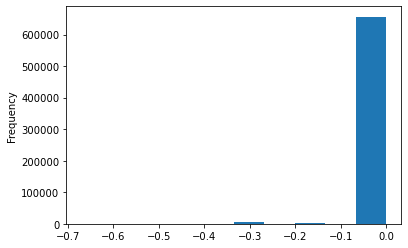

In [205]:
calculation_table_new['wtlgg_risk'].plot(kind='hist')

In [206]:
column = 'wtlgg_risk'
calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].min()) / (calculation_table_new[column].max() - calculation_table_new[column].min())	
#calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].mean()) / calculation_table_new[column].std()   

In [207]:
calculation_table_new['wtlgg_risk_norm'].describe()

count    664761.000000
mean          0.994441
std           0.053089
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: wtlgg_risk_norm, dtype: float64

<AxesSubplot:ylabel='Frequency'>

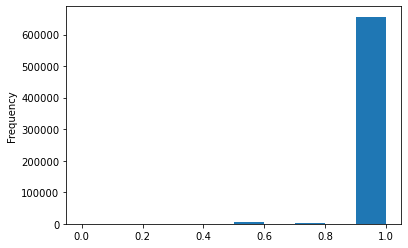

In [208]:
calculation_table_new['wtlgg_risk_norm'].plot(kind='hist')

In [209]:
calculation_table_new['wtlgg_risk_norm'] = 1 - calculation_table_new['wtlgg_risk_norm']

<AxesSubplot:ylabel='Frequency'>

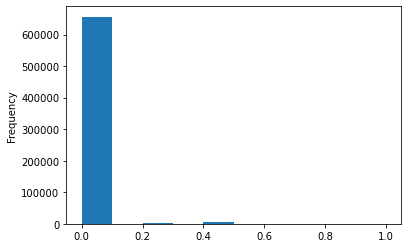

In [210]:
calculation_table_new['wtlgg_risk_norm'].plot(kind='hist')

In [211]:
calculation_table_new['wtlgg_risk_norm'].mean()

0.0055589611860727825

In [212]:
calculation_table_new['wtlgg_risk_norm'] = calculation_table_new['wtlgg_risk_norm'].fillna(0.01)

In [218]:
calculation_table_new.drop(columns=['wtlgg_risk_norm_tst'], inplace=True)

In [219]:
calculation_table_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801238 entries, 0 to 801237
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baum_id                          801238 non-null  object 
 1   lor_id                           801238 non-null  int64  
 2   gw_id                            801238 non-null  int64  
 3   boden_id                         801238 non-null  object 
 4   wetter_id                        801238 non-null  int64  
 5   soil_id                          801238 non-null  int64  
 6   rain_id                          801238 non-null  int64  
 7   fl_abs                           789765 non-null  float64
 8   art_bot                          801238 non-null  object 
 9   kontinentalitaet                 626551 non-null  object 
 10  wurzelsystem_werte               664761 non-null  float64
 11  naehrstoffanspruch_werte         628433 non-null  float64
 12  pH

In [ ]:
## er findet den wert -0.170 nicht, dabei existiert er, weiß nicht woran das liegt
#calculation_table[['fl_abs_cm', 'staunaessetoleranz_werte', 'wurzelsystem_werte', 'wtlgg', 'wtlgg_res', 'wtlgg_risk']].query('wtlgg_risk == -0.170')

In [ ]:
#calculation_table.groupby('wtlgg_risk').count()

#### Calculate the risk factor for every tree

In [220]:
#to do: automatize this so you only need to add the columns to the list or something
risk_items = ['drght_risk','wtlgg_risk_norm']
calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + calculation_table_new['wtlgg_risk_norm'])/(len(risk_items))
#Wtlgg_risk seems to be missing double drought risk though, corrected at comp risk calculation

In [222]:
calculation_table_new.head()

,baum_id,lor_id,gw_id,boden_id,wetter_id,soil_id,rain_id,fl_abs,art_bot,kontinentalitaet,...,typ,fl_abs_cm,drght,drght_res,drght_risk,wtlgg,wtlgg_res,wtlgg_risk,wtlgg_risk_norm,risk_score
0,00008100:000bbafb,525,496,B1400805161000000,433,427,433,3.767439,carpinus betulus,4,...,1,376.743902,-0.66,0.66,0.0,-0.33,0.33,0.0,0.0,0.0
1,00008100:000bbafd,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,1,376.743902,-0.66,0.66,0.0,-0.33,0.33,0.0,0.0,0.0
2,00008100:000bbafe,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,1,376.743902,-0.66,0.66,0.0,-0.33,0.33,0.0,0.0,0.0
3,00008100:000bbaff,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,1,376.743902,-0.66,0.66,0.0,-0.33,0.33,0.0,0.0,0.0
4,00008100:000bbb00,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,1,376.743902,-0.66,0.66,0.0,-0.33,0.33,0.0,0.0,0.0


In [ ]:
#nope ;) 
# I did this because Tableau is automatically assigning object type to geojsons, 
# sadly it also automatically assigns int to numbers in csv, so you end up having data type issues all the time, when you want to build relations

#calculation_table = calculation_table.astype({'lor_id': 'str'})

In [ ]:
#export for Tableau Test
#calculation_table.to_csv("data/cleaned/calculation_table_working_1.csv")

In [ ]:
# @nicco where does this table come from? - which one? gz. Nicco
#risk_agg.sort_values('risk_factor')

Calculating rick of tree stress by lack of nutrition 
item: nut_risk
columns needed: 
naerbew:
classification of soil 
1 = arm = -1
2 = mittel = -0.5
3 = reich = 0

naehrstoffanspruch_werte:
classification of tree needs

0 = gering = 1 
1 = gering/mittel = 1 
2 = mittel = 0.5
3 = mittel/hoch = 0.5
4 = hoch = 0

In [223]:
calculation_table_new['naerbew'].unique()

array([1., 2., 3.])

In [224]:
calculation_table_new['naehrstoffanspruch_werte'].unique()

array([ 2.,  3.,  0.,  4., nan])

In [225]:
#categorizing nutritional needs of the trees
def nut_req(y):
    if y == 0:
        return 1
    elif y == 1:
        return 1
    elif y == 2:
        return 0.5
    elif y == 3:
        return 0.5
    elif y == 4:
        return 0
    else:
        return 


In [226]:
def nut_soil(y):
    if y == 1:
        return -1
    elif y == 2:
        return -0.5
    elif y == 3:
        return 0
    else:
        return 

In [229]:
#new columns for 'nutr_req'
calculation_table_new['nutr_req'] = calculation_table_new['naehrstoffanspruch_werte'].apply(nut_req)

In [230]:
#new normalized column for 'soil_nut'
calculation_table_new['soil_nut'] = calculation_table_new['naerbew'].apply(nut_soil)

Calculating rick of tree stress by lack of nutrition 
item: nut_risk
columns needed: 
naerbew:
classification of soil 
1 = arm = -1
2 = mittel = -0.5
3 = reich = 0

naehrstoffanspruch_werte:
classification of tree needs

0 = gering = 1 
1 = gering/mittel = 1 
2 = mittel = 0.5
3 = mittel/hoch = 0.5
4 = hoch = 0

WENN x + y >= 0 dann 0 
WENN x + y = -0.5 --> -0.5
WENN x + y = -1 ---> -1

In [231]:
# calculate risk score depending on the trees ability to suffer lack of nutrition
# nut_req --> x
# soil_nut --> y
# setting -0.25 as default risk score when NaN 
def nut(x, y):
    if x + y >= 0:
        return 0
    elif (x+y) == -0.5:
        return -0.5
    elif (x+y) == -1:
        return -1
    else:
        return -0.25

In [232]:
calculation_table_new['nut_risk']=calculation_table_new.apply(lambda x : nut(x['nutr_req'], x['soil_nut']) , axis=1)

In [237]:
calculation_table_new['nut_risk_norm'] = calculation_table_new['nut_risk'] * -1

In [238]:
calculation_table_new['nut_risk_norm']

0         0.5
1         0.5
2         0.5
3         0.5
4         0.5
         ... 
801233   -0.0
801234   -0.0
801235   -0.0
801236    1.0
801237   -0.0
Name: nut_risk_norm, Length: 801238, dtype: float64

In [239]:
calculation_table_new['nut_risk_norm'] = calculation_table_new['nut_risk_norm'].replace(-0.0,0.0)

<AxesSubplot:ylabel='Frequency'>

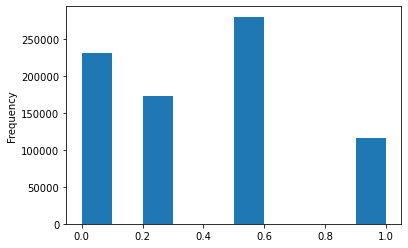

In [240]:
calculation_table_new['nut_risk_norm'].plot(kind='hist')

In [241]:
calculation_table_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801238 entries, 0 to 801237
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baum_id                          801238 non-null  object 
 1   lor_id                           801238 non-null  int64  
 2   gw_id                            801238 non-null  int64  
 3   boden_id                         801238 non-null  object 
 4   wetter_id                        801238 non-null  int64  
 5   soil_id                          801238 non-null  int64  
 6   rain_id                          801238 non-null  int64  
 7   fl_abs                           789765 non-null  float64
 8   art_bot                          801238 non-null  object 
 9   kontinentalitaet                 626551 non-null  object 
 10  wurzelsystem_werte               664761 non-null  float64
 11  naehrstoffanspruch_werte         628433 non-null  float64
 12  pH

In [242]:
#to do: automatize this so you only need to add the columns to the list or something
#MASSIVE TO DO DEFAULT VALUES FOR NAN IN DRGHT_RISK AND WTLGG_RISK -- is this still a problem after changing gw_stations with missing values?

#risk items so far
# drght_risk
# wtlgg_risk
# nut_risk


risk_items = ['drght_risk','wtlgg_risk_norm', 'nut_risk_norm']
calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + calculation_table_new['wtlgg_risk_norm'] + calculation_table_new['nut_risk_norm'])/(len(risk_items))

In [ ]:
#calculation_table.head(50).tail(50)
#calculation_table['risk_factor'].min()

Now calculating risk for Bodenverdichtungs risk

ld score --> Lagerungsdichte 
1 - sehr gering / very low / < 1.3
2 - gering / low / >= 1.3 and <1.55 
3 - mittel / medium / >=1.55 and < 1.75 
4 - hoch / hight  / >= 1.75 and < 1.95
5 -sehr hoch / very high / >= 1.95

Verdichtungstoleranz 
1 - gering / low
2 - mittel / medium
3 - gut  / high


In [243]:
#checking values for ld 
calculation_table_new['ld'].unique()

array([1.6 , 1.57, 1.51, 1.45, 0.9 , 1.48, 1.54, 1.3 , 1.42])

In [ ]:
#checking values for bodenverdichtungstoleranz_werte
calculation_table_new['bodenverdichtungstoleranz_werte'].info()

In [ ]:
# for the calculations 
#bodenverdichtungstoleranz_werte = x
#ld = Y

Now calculating risk for Bodenverdichtungs risk

ld score --> Lagerungsdichte - a 
1 - sehr gering / very low / < 1.3
2 - gering / low / >= 1.3 and <1.55 
3 - mittel / medium / >=1.55 and < 1.75 
4 - hoch / hight  / >= 1.75 and < 1.95
5 -sehr hoch / very high / >= 1.95

Verdichtungstoleranz bodenverdichtungstoleranz_werte
0 - gering / low / 0
1 - mittel / medium / 0.5 
2 - gut  / high / 1

In [244]:
#categorzing ld score to a 0-1 interval
#setting -0.35 as default value for NaNs

def ld_score_calc(a):
    if a < 1.3:
        return 0
    elif a >= 1.3 and a < 1.55:
        return -0.25
    elif a >= 1.55 and a < 1.75:
        return -0.5
    elif a >= 1.75 and a < 1.95:
        return -0.75 
    elif a >= 1.95:
        return -1 
    else:
        return -0.35

In [245]:
#new columns for 'ld_score'
calculation_table_new['ld_score'] = calculation_table_new['ld'].apply(ld_score_calc)

In [247]:
#checking our ld score values 
calculation_table_new['ld_score'].unique()

array([-0.5 , -0.25,  0.  ])

In [ ]:
calculation_table['bodenverdichtungstoleranz_werte'].info()

In [250]:
#categorizing bodenverdichtungstoleranz_werte values for 0,1,2 to values between 0 and 1, nans as 0.3
def comp_tol(v):
    if v == 0:
        return 0
    elif v == 1:
        return 0.5
    elif v == 2:
        return 1
    else:
        return 0.3

In [251]:
#new columns for 'comp_tol' -- compaction tolerance
calculation_table_new['comp_tol_score'] = calculation_table_new['bodenverdichtungstoleranz_werte'].apply(comp_tol)

comp_tol_score 0= 0.01, 0, 0.5, 1  --> 0 bad 1 good 
ld_score = -0.5 , -0.25,  0.  , -0.35 --> 0 good -1 bad 

X = 0, 0.01, 0.5, 1
Y = 0, -0.25, -0.35, -0.5, -0.75, -1 

WENN X + Y > 0 DANN 0 
WENN X + Y = -1 DANN -1 
WENN X + Y = -0.99 DANN -1
WENN X + Y = -0.75 DANN -0.75
WENN X + Y = -0.74 DANN -0.75
WENN X + Y = -0.5  DANN -0.5
WENN X + Y = -0.49 DANN -0.5
WENN X + Y = -0.35 DANN -0.33
WENN X + Y = -0.34 DANN -0.33
WENN X + Y = -0.25 DANN -0.25 
WENN X + Y = -0.24 DANN -0.25



In [252]:
# calculating risk score depending on the trees ability to resist soil compaction 
# comp_tol_score--> x
# ld_score --> y
# setting -0.25 as default risk score when NaN 
def comp_sc(x, y):
    if (x+y) >= 0:
        return 0
    elif (x+y) == -1 or (x+y) == -0.99:
        return -1
    elif (x+y) == -0.75 or (x+y) == -0.74:
        return -0.75
    elif (x+y) == -0.5 or (x+y) == -0.49:
        return -0.5
    elif (x+y) == -0.35 or (x+y) == -0.34:
        return -0.33
    elif (x+y) == -0.25 or (x+y) == -0.24:
        return -0.25
    else:
        return

In [253]:
#calculation compaction risk score as comp_risk_score
calculation_table_new['comp_risk_score']=calculation_table_new.apply(lambda x : comp_sc(x['comp_tol_score'], x['ld_score']) , axis=1)

In [256]:

calculation_table_new['comp_risk_score'] = calculation_table_new['comp_risk_score']*-1


In [257]:
calculation_table_new['comp_risk_score'] = calculation_table_new['comp_risk_score'].replace(-0.0,0.0)

In [258]:
calculation_table_new

,baum_id,lor_id,gw_id,boden_id,wetter_id,soil_id,rain_id,fl_abs,art_bot,kontinentalitaet,...,wtlgg_risk,wtlgg_risk_norm,risk_score,nutr_req,soil_nut,nut_risk,nut_risk_norm,ld_score,comp_tol_score,comp_risk_score
0,00008100:000bbafb,525,496,B1400805161000000,433,427,433,3.767439,carpinus betulus,4,...,0.0,0.0,0.166667,0.5,-1.0,-0.5,0.5,-0.50,0.0,0.50
1,00008100:000bbafd,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,0.0,0.0,0.166667,0.5,-1.0,-0.5,0.5,-0.50,0.0,0.50
2,00008100:000bbafe,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,0.0,0.0,0.166667,0.5,-1.0,-0.5,0.5,-0.50,0.0,0.50
3,00008100:000bbaff,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,0.0,0.0,0.166667,0.5,-1.0,-0.5,0.5,-0.50,0.0,0.50
4,00008100:000bbb00,525,496,B1400805161000000,433,427,433,3.767439,acer pseudoplatanus,4,...,0.0,0.0,0.166667,0.5,-1.0,-0.5,0.5,-0.50,0.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801233,00008100:002db640,309,6010,B0300089051000300,430,430,433,NaN,robinia pseudoacacia,4,...,0.0,0.0,0.000000,1.0,-0.5,0.0,0.0,-0.25,0.0,0.25
801234,00008100:002db641,309,6010,B0300089051000300,430,430,433,NaN,acer platanoides,4,...,0.0,0.0,0.111667,0.5,-0.5,0.0,0.0,-0.25,0.0,0.25
801235,00008100:002db642,309,6010,B0300089051000300,430,430,433,NaN,robinia pseudoacacia,4,...,0.0,0.0,0.000000,1.0,-0.5,0.0,0.0,-0.25,0.0,0.25
801236,00008100:002db652,167,4013,B0800396161000200,403,403,403,14.980000,quercus robur,6,...,0.0,0.0,0.446667,0.0,-1.0,-1.0,1.0,-0.50,1.0,0.00


<AxesSubplot:ylabel='Frequency'>

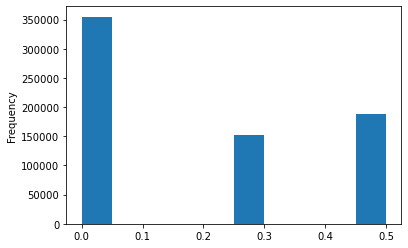

In [259]:
calculation_table_new['comp_risk_score'].plot(kind='hist')

In [260]:
column = 'comp_risk_score'
calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].min()) / (calculation_table_new[column].max() - calculation_table_new[column].min())	
#calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].mean()) / calculation_table_new[column].std()   

<AxesSubplot:ylabel='Frequency'>

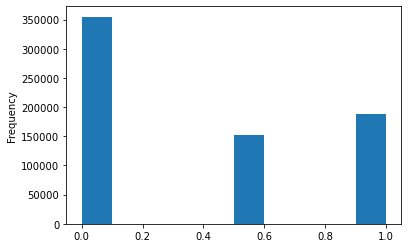

In [262]:
calculation_table_new['comp_risk_score_norm'].plot(kind='hist')

In [263]:
#to do: automatize this so you only need to add the columns to the list or something
#MASSIVE TO DO DEFAULT VALUES FOR NAN IN DRGHT_RISK AND WTLGG_RISK -- is this still a problem after changing gw_stations with missing values?

#risk items so far
# drght_risk
# wtlgg_risk
# nut_risk
# comp_risk_score 


risk_items = ['drght_risk','wtlgg_risk_norm', 'nut_risk_norm', 'comp_risk_score_norm']
calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'])/(len(risk_items))

In [ ]:
calculation_table.columns

Now preparing and calculating the values for Versieglung and the accompanying risk score 


Strassenbaum 
Typ=1  
vgstrasse 0 - 100 normalized -1 - 0 

Anlagenbaum
Typ=2 
vg 0 - 100 --> normalized range -1 - 0
for consistency's sake lets invert this by multiplying vgs/vgstrasse *-1/100

versiegelungstoleranz_werte 0,1,2 --> 0=low(bad),1=(medium)2=high(good) 0=0, 1=-0.5, 2=-1




IF 1 dann 'vgstrasse'
IF 2 dann 'vg' 


In [264]:
#normalizing vgstrasse to be in the regual stressor inverval of -1 to 0 
calculation_table_new['vgstrasse'] = calculation_table_new['vgstrasse']*-1/100


In [265]:
#normalizing vg to be in the regual stressor inverval of -1 to 0 
calculation_table_new['vg'] = calculation_table_new['vg']*-1/100

In [ ]:
#checking values 
#calculation_table.head()

In [ ]:
# it seems like this appears several times?
'''
Strassenbaum 
Typ=1  
vgstrasse 0 - 100 normalized -1 - 0 

Anlagenbaum
Typ=2 
vg 0 - 100 --> normalized range -1 - 0
for consistency's sake lets invert this by multiplying vgs/vgstrasse *-1/100

versiegelungstoleranz_werte 0,1,2 --> 0=low(bad),1=(medium)2=high(good) 0=0, 1=0.5, 2=1 --> NaNs = 0.5
'''

In [266]:
#categorizing versiegelungstoleranz_werte  values for 0,1,2 to values between 0 and 1, nans as 0.5
def vers_tol(o):
    if o == 0:
        return 0
    elif o == 1:
        return 0.5
    elif o == 2:
        return 1
    else:
        return 0.5

In [267]:
#new column for 'seal_tol' -- soil sealing tolerance
calculation_table_new['seal_tol'] = calculation_table_new['versiegelungstoleranz_werte'].apply(vers_tol)

In [ ]:
calculation_table.head()

In [ ]:
# we now have a function to categorize the bodenverdichtungstoleranz_werte in an inverval of 0 to 1 
# now we have to 
#risiko_score = vg + seal_tol for Anlagenbäume (typ=2)
#and 
#risiko_score = vgstrasse + seal_tol for Strassenbäume (typ=1)

In [268]:
# calculating risk score depending on the trees ability to resist soil compaction 
# seal_tol--> x
# vg / vgstrasse --> y
def seal_sc(x, y, z, a):
    if a == 1:
        if (x+y) >= 0:
            return 0
        elif (x+y) == -1:
            return -1
        elif (x+y) < 0.00 and (x+y) > -0.25:
            return -0.25
        elif (x+y) <= -0.25 and (x+y) > -0.50:
            return -0.5
        elif (x+y) <= -0.5 and (x+y) > -0.75:
            return -0.75
        elif (x+y) <= -0.75 and (x+y) > -1:
            return -1
        else:
            return
    else:
        if (x+z) >= 0:
            return 0
        elif (x+z) == -1:
            return -1
        elif (x+z) < 0.00 and (x+z) > -0.25:
            return -0.25
        elif (x+z) <= -0.25 and (x+z) > -0.50:
            return -0.5
        elif (x+z) <= -0.5 and (x+z) > -0.75:
            return -0.75
        elif (x+z) <= -0.75 and (x+z) > -1:
            return -1
        else:
            return


In [273]:
calculation_table_new['seal_risk_score']=calculation_table_new.apply(lambda x : seal_sc(x['seal_tol'], x['vgstrasse'], x['vg'], x['typ']) , axis=1)

In [274]:
calculation_table_new['seal_risk_score'] = calculation_table_new['seal_risk_score']*-1

In [275]:
calculation_table_new['seal_risk_score'] = calculation_table_new['seal_risk_score'].replace(-0.0,0.0)

<AxesSubplot:ylabel='Frequency'>

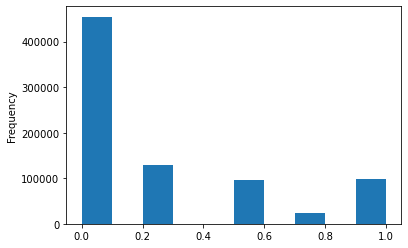

In [276]:
calculation_table_new['seal_risk_score'].plot(kind='hist')

In [277]:
#to do: automatize this so you only need to add the columns to the list or something
#MASSIVE TO DO DEFAULT VALUES FOR NAN IN DRGHT_RISK AND WTLGG_RISK

#risk items so far
# drght_risk
# wtlgg_risk
# nut_risk
# comp_risk_score 
# seal_risk_score (we need to look at this one again)


risk_items = ['drght_risk','wtlgg_risk_norm', 'nut_risk_norm', 'comp_risk_score_norm' 'seal_risk_score']
calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'] +
                                    calculation_table_new['seal_risk_score'])/(len(risk_items))

In [280]:
# check
calculation_table_new['risk_score'].unique()

array([0.625     , 0.5       ,        nan, 0.41625   , 0.665     ,
       0.25      , 0.125     , 0.19      , 0.29125   , 0.3125    ,
       0.375     , 0.0425    , 0.1675    , 0.46      , 0.355     ,
       0.        , 0.065     , 0.33375   , 0.20875   , 0.2075    ,
       0.45875   , 0.0625    , 0.4575    , 0.29      , 0.04125   ,
       0.16625   , 0.415     , 0.75      , 0.8325    , 0.585     ,
       0.5825    , 0.24813433, 0.4175    , 0.54      , 0.165     ,
       0.56156716, 0.3325    , 0.0825    , 0.5425    , 0.21      ,
       0.6675    , 0.335     , 0.71      , 0.875     , 0.2925    ,
       0.7075    , 0.54125   , 0.7925    , 0.62313433, 0.37313433,
       0.74813433, 0.43656716, 0.79      , 0.9175    , 0.08375   ,
       0.12313433, 0.49813433, 0.43563433, 0.31156716, 0.87313433,
       0.5025    , 0.68656716, 0.1475    , 0.66625   , 0.87686567,
       0.25186567, 0.12686567, 0.31343284, 0.18936567, 0.18656716,
       0.58375   , 0.50186567, 0.75186567, 0.62686567, 0.06343

In [281]:
# Now calculating item Temperature avg jul 2022
display(calculation_table['diff_t_max'].value_counts())
display(calculation_table['diff_t_max'].unique())
# atm 04.09.22 13:28 601055 rows

3.20    247638
3.63    229145
3.24    165753
3.47    112671
3.78     46031
Name: diff_t_max, dtype: int64

array([3.63, 3.78, 3.2 , 3.47, 3.24])

In [282]:
display(calculation_table['diff_t_soil'].value_counts())
display(calculation_table['diff_t_soil'].unique())
# atm 04.09.22 13:28 542391 rows

2.30    250497
1.57    248825
4.59    228838
3.42     73078
Name: diff_t_soil, dtype: int64

array([3.42, 2.3 , 4.59, 1.57])

In [283]:
ft = pd.read_csv('data/cleaned/future_trees_final.csv', index_col=0)

In [284]:
ft['hitzevertraeglichkeit_werte'].unique()

array([ 0., nan,  1.,  2.])

Now calculating risk for temperature risk
We expect every datapoint to be above the 3 degree threshhold --> therefore we could manually set the column to -1, we opt for calculating it anyways, in order to make the model useable for other observations in the future.

diff_t_max --> difference to ljm  - we will have to code the values to match the following categories, NaNs will be coded to -1 
<1.5 degrees C --> -0.5
1.5-3 degrees C --> -0.75
>3 degrees C --> -1
NaNs will be assigned the value of -1 (max risk for NaNs)

hitzevertraeglichkeit_werte 
0 - mittel --> 0
1 - stark --> 0,5
2 - sehr stark --> 1
Nan --> 0 (min resistance for NaNs)

In [285]:
#categorzing diff_t_max to a 0-1 interval
#setting -1 as default value for NaNs

def diff_t_cat(l):
    if l < 1.5:
        return -0.5
    elif l >= 1.5 and l <= 3.0:
        return -0.75
    elif l > 3.0:
        return -1
    else:
        return -1

In [289]:
#new columns for 'diff_temp_score'
calculation_table_new['diff_temp_score'] = calculation_table_new['diff_t_max'].apply(diff_t_cat)

In [ ]:
#calculation_table.info()

In [290]:
#categorizing hitzevertraeglichkeit_werte values for 0,1,2 to values between 0 and 1, nans as 0
def heat_tol(v):
    if v == 0:
        return 0
    elif v == 1:
        return 0.5
    elif v == 2:
        return 1
    else:
        return 0

In [291]:
#new columns for 'heat_tol_score' -- heattolerance
calculation_table_new['heat_tol_score'] = calculation_table_new['hitzevertraeglichkeit_werte'].apply(heat_tol)

In [ ]:
#calculation_table.info()

In [ ]:
# exporting current state to save df
# calculation_table.to_csv('data/cleaned/calc_table_stand_13_43_4_sep.csv')

In [293]:
display(calculation_table_new['heat_tol_score'].unique())
display(calculation_table_new['diff_temp_score'].unique())

array([0. , 0.5, 1. ])

array([-1])

In [294]:
# calculating risk score depending on the trees ability to resist higher temperatures 
# heat_tol_score--> x
# diff_temp_score --> y
# setting -0.25 as default risk score when NaN 
def heat_sc(x, y):
    if (x+y) >= 0:
        return 0
    elif (x+y) == -1:
        return -1
    elif (x+y) == -0.75:
        return -0.75
    elif (x+y) == -0.5:
        return -0.5
    elif (x+y) == -0.25:
        return -0.25
    else:
        return

In [295]:
#calculation heat risk score as temp_risk_score
calculation_table_new['temp_risk_score']=calculation_table_new.apply(lambda x : heat_sc(x['heat_tol_score'], x['diff_temp_score']) , axis=1)

<AxesSubplot:ylabel='Frequency'>

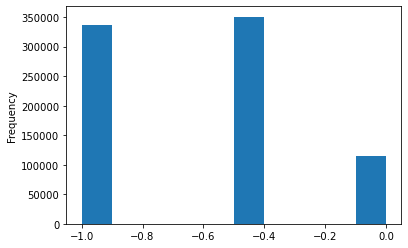

In [296]:
calculation_table_new['temp_risk_score'].plot(kind='hist')

In [297]:
calculation_table_new['temp_risk_score'] = calculation_table_new['temp_risk_score']*-1

In [298]:
calculation_table_new['temp_risk_score'] = calculation_table_new['temp_risk_score'].replace(-0.0,0.0)

IDEA use dummy variables for sealing typ 1/2

In [299]:
#to do: automatize this so you only need to add the columns to the list or something
#MASSIVE TO DO DEFAULT VALUES FOR NAN IN DRGHT_RISK AND WTLGG_RISK

#risk items so far
# drght_risk
# wtlgg_risk
# nut_risk
# comp_risk_score 
# seal_risk_score (we need to look at this one again)


risk_items = ['drght_risk','wtlgg_risk_norm', 'nut_risk_norm', 'comp_risk_score_norm' 'seal_risk_score', 'temp_risk_score']
calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'] +
                                    calculation_table_new['seal_risk_score'] +
                                    calculation_table_new['temp_risk_score']
                                    )/(len(risk_items))

In [ ]:
# now calculating avg temp 20 cm 

'''
diff_t_soil --> difference to ljm  - we will have to code the values to match the following categories, NaNs will be coded to -1 
<1.5 degrees C --> -0.5
1.5-3 degrees C --> -0.75
>3 degrees C --> -1
NaNs will be assigned the value of -1 (max risk for NaNs)

using the same resistance value as in previous item (heat risk score )
calculation_table['heat_tol_score']
'''

In [475]:
calculation_table_new['diff_t_soil'].unique()

array([3.42, 2.3 , 4.59, 1.57])

In [468]:
calculation_table_new['diff_t_soil'] = calculation_table_new['diff_t_soil']*10

In [469]:
calculation_table_new['diff_t_soil'].unique()

array([3.42, 2.3 , 4.59, 1.57])

In [467]:
calculation_table_new['heat_tol_score'].unique()

array([0. , 0.5, 1. ])

In [482]:
#categorzing diff_t_soil to a 0-1 interval
#setting -1 as default value for NaNs

def diff_t_soil(l):
    if l < 1.5:
        return -0.5
    elif l >= 1.5 and l <= 3.0:
        return -0.75
    elif l > 3.0:
        return -1
    else:
        return -1

In [470]:
#using this instead
#column = 'diff_t_soil'
#calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].min()) / (calculation_table_new[column].max() - calculation_table_new[column].min())	
#calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].mean()) / calculation_table_new[column].std()   

In [483]:
#new columns for 'soil_temp_cat'
calculation_table_new['soil_temp_cat'] = calculation_table_new['diff_t_soil'].apply(diff_t_soil)

In [480]:
calculation_table_new['soil_temp_cat'] = calculation_table_new['diff_t_soil_norm']*-1

<AxesSubplot:ylabel='Frequency'>

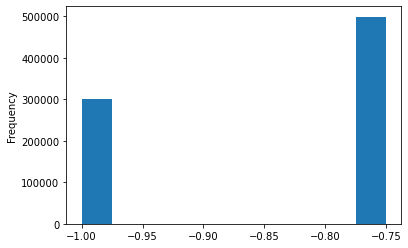

In [484]:
calculation_table_new['soil_temp_cat'].plot(kind='hist')

In [485]:
# calculating risk score depending on the trees ability to resist higher temperatures 20 cm above the ground 
# heat_tol_score--> x
# soil_temp_cat--> y
# setting -0.25 as default risk score when NaN 
def soil_heat_sc(x, y):
    if (x+y) >= 0:
        return 0
    elif (x+y) == -1:
        return -1
    elif (x+y) == -0.75:
        return -0.75
    elif (x+y) == -0.5:
        return -0.5
    elif (x+y) == -0.25:
        return -0.25
    else:
        return

In [486]:
#calculation soil heat risk score as temp_risk_score
calculation_table_new['soil_heat_risk_score']=calculation_table_new.apply(lambda x : soil_heat_sc(x['heat_tol_score'], x['soil_temp_cat']) , axis=1)

<AxesSubplot:ylabel='Frequency'>

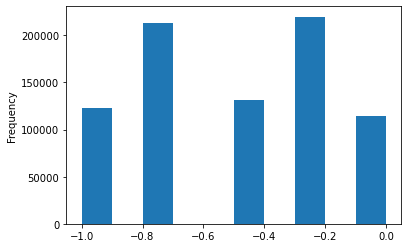

In [487]:
calculation_table_new['soil_heat_risk_score'].plot(kind='hist')

In [488]:
calculation_table_new['soil_heat_risk_score'] = calculation_table_new['soil_heat_risk_score']*-1

In [489]:
calculation_table_new['soil_heat_risk_score'] = calculation_table_new['soil_heat_risk_score'].replace(-0.0,0.0)

<AxesSubplot:ylabel='Frequency'>

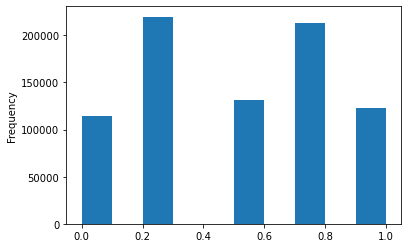

In [490]:
calculation_table_new['soil_heat_risk_score'].plot(kind='hist')

In [388]:

risk_items = ['drght_risk','wtlgg_risk_norm', 'nut_risk_norm', 'comp_risk_score_norm' 'seal_risk_score', 'temp_risk_score', 'soil_heat_risk_score']
calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'] +
                                    calculation_table_new['seal_risk_score'] +
                                    calculation_table_new['temp_risk_score'] +
                                    calculation_table_new['soil_heat_risk_score']
                                    )/(len(risk_items))

In [ ]:
#calculatig ph 
#when ph_soil is in inteval ph min ph max 
#pH-milieu_sensibel_werte --> tolerance values of trees 0/1

In [318]:
calculation_table_new['pH-milieu_sensibel_werte']

0         1.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
801233    1.0
801234    1.0
801235    1.0
801236    1.0
801237    1.0
Name: pH-milieu_sensibel_werte, Length: 801238, dtype: float64

In [319]:
#setting NaNs to 1 
calculation_table_new['pH-milieu_sensibel_werte'] = calculation_table_new['pH-milieu_sensibel_werte'].fillna(1)

In [320]:
calculation_table_new['pH-milieu_sensibel_werte'] = calculation_table_new['pH-milieu_sensibel_werte'].astype(int)

In [321]:
calculation_table_new['pH-milieu_sensibel_werte'].value_counts()

1    731656
0     69582
Name: pH-milieu_sensibel_werte, dtype: int64

In [ ]:
#export df 
#calculation_table.to_csv('data/cleaned/calc_table_stand_17_23_4_sep.csv')

In [ ]:
#calculation_table['pH_min'] = calculation_table['pH_min'].astype(float)
#calculation_table['pH_max'] = calculation_table['pH_max'].astype(float)
#calculation_table['ph_inteval'] = pd.Interval(calculation_table['pH_min'], calculation_table['pH_max'])
#tried to get interval to work - didn't succeed and went with pd.between

In [ ]:
# testing if it works
# return boolean True/False  
'''
test['test']= calculation_table['ph_soil'].between(calculation_table['pH_min'], calculation_table['pH_max'], inclusive="both") #alterntive , inclusive="neither"

	ph_soil	pH_min	pH_max
0	7.0	4.0	7.0
1	7.0	6.0	8.0
2	7.0	6.0	8.0
3	7.0	6.0	8.0
4	7.0	6.0	8.0
...	...	...	...
801281	4.5	3.0	8.0
801282	4.5	6.0	8.0
801283	4.5	6.0	8.0
801284	4.5	4.0	7.0
801285	4.5	3.0	8.0
'''

'''
0          True
1          True
2          True
3          True
4          True
          ...  
801281     True
801282    False
801283    False
801284     True
801285     True
'''

In [323]:
calculation_table_new['pH_int_check'] = calculation_table_new['ph_soil'].between(calculation_table_new['pH_min'], calculation_table_new['pH_max'], inclusive="both")

In [325]:
calculation_table_new['pH_int_check'].value_counts()

True     548161
False    253077
Name: pH_int_check, dtype: int64

In [ ]:
'''pH-milieu_sensibel_werte = 1 --> sensibel / 0 --> not sensible 
IF pH_int_check = True --> tree is standing in soil within the required pH-interval
IF pH_int_check = False --> tree not standing in soil within the required pH-interval

IF pH_int_check = True AND pH-milieu_sensibel_werte = 1 OR pH-milieu_sensibel_werte = 0 --> risk = 0
IF pH_int_check = False AND pH-milieu_sensibel_werte = 1 --> risk = -1 (bad)
IF pH_int_check = False AND pH-milieu_sensibel_werte = 0 --> risk = 0 (no risk)
'''


In [326]:
# calculating risk score depending on the trees ability to resist soil pH levels outside their pH tolerance interval 
# pH-milieu_sensibel_werte 1 --> sensible / 0 --> not sensible --> x 
# pH_int_check--> True/False if in interval -->y 
# setting -0.25 as default risk score when NaN 
def pH_sc(x, y):
    if x==1 and y==True:
        return 0
    elif x==0 and y==True:
        return 0
    elif x==1 and y==False:
        return 1
    elif x==0 and y==False:
        return 0
    else:
        return

In [327]:
#calculation soil pH risk score as pH_risk
calculation_table_new['pH_risk']=calculation_table_new.apply(lambda x : pH_sc(x['pH-milieu_sensibel_werte'], x['pH_int_check']) , axis=1)

In [ ]:
#calculation_table[['pH_min','pH_max','ph_soil','pH-milieu_sensibel_werte','pH_int_check', 'pH_risk']].tail(50)

In [ ]:
#TODO check if the intervals in the future Tree table are correct -- we changed the 8/5 mixup are there other problems?

In [ ]:
#before adding pH_risk
#calculation_table['risk_factor'].mean()
#-0.325259874432153

In [328]:
#before adding pH_risk
#calculation_table_new['risk_score'].mean()
#0.31154801308147306

0.31154801308147306

In [389]:
risk_items = ['drght_risk','wtlgg_risk_norm', 'nut_risk_norm', 'comp_risk_score_norm' 'seal_risk_score', 'temp_risk_score', 'soil_heat_risk_score','pH_risk']
calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'] +
                                    calculation_table_new['seal_risk_score'] +
                                    calculation_table_new['temp_risk_score'] +
                                    calculation_table_new['soil_heat_risk_score']+
                                    calculation_table_new['pH_risk']
                                    )/(len(risk_items))

In [ ]:
#after adding pH_risk
#calculation_table['risk_factor'].mean()
#-0.299826869481912
calculation_table['risk_factor'].sort_values(ascending=False).value_counts().head(50)

In [390]:
calculation_table_new['risk_score'].mean()

0.29142582220974117

In [ ]:

calculation_table['hitzeempfindlichkeit_werte'].unique()

In [ ]:
calculation_table['hitzevertraeglichkeit_werte'].unique()

In [ ]:
calculation_table.columns

In [ ]:
calculation_table['diff_t_max'].tail(50)

In [ ]:
# I dont see the point in calculation_table['hitzeempfindlichkeit_werte'] --> will calculate it anyway and assign 1 (empfindlich) to Nans
# #new columns for 'diff_temp_score' calculation_table['diff_temp_score'] = calculation_table['diff_t_max'].apply(diff_t_cat) was calculated earlier for # temp_risk_score --> will be reused as per ollis mapping

In [ ]:
calculation_table['diff_temp_score']

In [331]:
#setting NaNs to 1 
calculation_table_new['hitzeempfindlichkeit_werte'] = calculation_table_new['hitzeempfindlichkeit_werte'].fillna(1)

In [332]:
calculation_table_new['hitzeempfindlichkeit_werte'].value_counts()

1.0    672874
0.0    128364
Name: hitzeempfindlichkeit_werte, dtype: int64

In [333]:
calculation_table_new['hitzeempfindlichkeit_werte'] = calculation_table_new['hitzeempfindlichkeit_werte'].astype(int)

In [334]:
calculation_table_new['hitzeempfindlichkeit_werte'].unique()

array([0, 1])

In [ ]:
'''
'hitzeempfindlichkeit_werte' 1 = vul 0 = not vul
['diff_temp_score'] -0.5, -0.75, -1 

'''

In [ ]:
'''
#categorzing diff_t_max to a 0-1 interval
#setting -1 as default value for NaNs

def diff_t_cat(l):
    if l < 1.5:
        return -0.5
    elif l >= 1.5 and l <= 3.0:
        return -0.75
    elif l > 3.0:
        return -1
    else:
        return -1
'''

In [ ]:
calculation_table.to_csv('data/cleaned/calc_table_stand_19_17_4_sep.csv')

In [339]:
# calculating risk score depending on the trees vulnerability to resist higher temperatures 
# hitzeempfindlichkeit_werte--> x
# diff_temp_score --> y
# setting base vulnerability of -0.33 for all trees  
def heat_vulnearbility_sc(x, y):
    if x==1 and  y==-0.5:
        return -0.5
    elif x==1 and  y==-0.75:
        return -0.75
    elif x==1 and  y==-1:
        return -1
    elif x==0 and  y==-0.5:
        return -0.4
    elif x==0 and  y==-0.75:
        return -0.33
    elif x==0 and  y==-1:
        return -0.33
    else:
        return

In [345]:
#calculation heat vulnerability score
calculation_table_new['heat_vuln_risk']=calculation_table_new.apply(lambda x : heat_vulnearbility_sc(x['hitzeempfindlichkeit_werte'], x['diff_temp_score']) , axis=1)

In [346]:
calculation_table_new['heat_vuln_risk'].value_counts()

-1.00    672874
-0.33    128364
Name: heat_vuln_risk, dtype: int64

In [350]:
calculation_table_new['heat_vuln_risk'] = calculation_table_new['heat_vuln_risk']*-1

<AxesSubplot:ylabel='Frequency'>

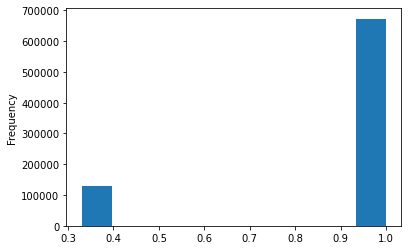

In [351]:
calculation_table_new['heat_vuln_risk'].plot(kind='hist')

In [352]:
column = 'heat_vuln_risk'
calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].min()) / (calculation_table_new[column].max() - calculation_table_new[column].min())	
#calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].mean()) / calculation_table_new[column].std()   

<AxesSubplot:ylabel='Frequency'>

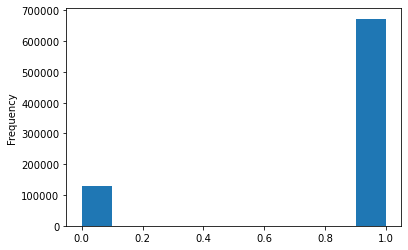

In [353]:
calculation_table_new['heat_vuln_risk_norm'].plot(kind='hist')

In [355]:
calculation_table_new['heat_vuln_risk_norm'].unique()

array([0., 1.])

In [391]:



risk_items = [  'drght_risk',
                'wtlgg_risk_norm', 
                'nut_risk_norm', 
                'comp_risk_score_norm', 
                'seal_risk_score', 
                'temp_risk_score', 
                'soil_heat_risk_score', 
                'pH_risk', 
                'heat_vuln_risk_norm']

calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'] +
                                    calculation_table_new['seal_risk_score'] +
                                    calculation_table_new['temp_risk_score'] +
                                    calculation_table_new['soil_heat_risk_score'] +
                                    calculation_table_new['pH_risk'] +
                                    calculation_table_new['heat_vuln_risk_norm']
                                    )/(len(risk_items))



In [359]:
calculation_table_new['risk_score'].value_counts()
#mean = -0.36622490513636535
#min = -0.7777777777777778
#mode = -0.222222

0.222222    70350
0.166667    34480
0.388889    28109
0.138889    26728
0.277778    25577
            ...  
0.278889        1
0.721393        1
0.665837        1
0.073889        1
0.685556        1
Name: risk_score, Length: 200, dtype: int64

In [ ]:
calculation_table.columns.sort_values()

In [ ]:
#now calculating Anspruch an den Boden --> soil_dem



In [360]:
calculation_table_new['anspueche_an_den_boden'].info()
#801286 entries
#608560 non-null 
#192726 null

# will set null values to neutral soil demand 

<class 'pandas.core.series.Series'>
Int64Index: 801238 entries, 0 to 801237
Series name: anspueche_an_den_boden
Non-Null Count   Dtype  
--------------   -----  
608528 non-null  float64
dtypes: float64(1)
memory usage: 28.4 MB


In [ ]:
#checking for values
calculation_table['anspueche_an_den_boden'].unique()

In [361]:
#setting NaN to 1 --> neutral soil demand 
calculation_table_new['anspueche_an_den_boden'] = calculation_table_new['anspueche_an_den_boden'].fillna(1)

In [ ]:
'''
Berlin hat bloeden Boden, immer schlecht, Bro.
'''
# Therefore 
#if anspueche_an_den_boden = 0 --> low demand --> risk score --> soil_dem = 0
#if anspueche_an_den_boden = 1 --> neutral demand --> risk score --> soil_dem -0.5
#if anspueche_an_den_boden = 2 --> low demand --> risk score --> soil_dem -1

In [363]:
def soil_dem(x):
    if x==0:
        return 0
    elif x==1:
        return 0.5
    elif x==2:
        return 1
    else:
        return 1

In [364]:
#calculating soil dem risk 
calculation_table_new['soil_dem_risk']=calculation_table_new.apply(lambda x : soil_dem(x['anspueche_an_den_boden']) , axis=1)

In [366]:
calculation_table_new['soil_dem_risk'].describe()

count    801238.000000
mean          0.382126
std           0.344461
min           0.000000
25%           0.000000
50%           0.500000
75%           0.500000
max           1.000000
Name: soil_dem_risk, dtype: float64

In [ ]:
#before
#calculation_table['risk_factor'].describe()
'''
count    459285.000000
mean         -0.366225
std           0.120882
min          -0.777778
25%          -0.454444
50%          -0.378889
75%          -0.277778
max          -0.036667
Name: risk_factor, dtype: float64
'''

In [392]:
risk_items = [  'drght_risk',
                'wtlgg_risk_norm', 
                'nut_risk_norm', 
                'comp_risk_score_norm', 
                'seal_risk_score', 
                'temp_risk_score', 
                'soil_heat_risk_score', 
                'pH_risk', 
                'heat_vuln_risk_norm',
                'soil_dem_risk']

calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'] +
                                    calculation_table_new['seal_risk_score'] +
                                    calculation_table_new['temp_risk_score'] +
                                    calculation_table_new['soil_heat_risk_score'] +
                                    calculation_table_new['pH_risk'] +
                                    calculation_table_new['heat_vuln_risk_norm'] +
                                    calculation_table_new['soil_dem_risk']
                                    )/(len(risk_items))


In [ ]:
#after
#calculation_table['risk_factor'].describe()
'''
count    459285.000000
mean         -0.364497
std           0.124785
min          -0.784000
25%          -0.459000
50%          -0.375000
75%          -0.275000
max          -0.100000
Name: risk_factor, dtype: float64
'''

In [ ]:
#calculation_table.to_csv('data/cleaned/calc_table_stand_19_47_4_sep.csv')

In [ ]:
# Kontinentalität --> cont 

In [371]:
calculation_table_new['kontinentalitaet'].isnull().value_counts()
'''
False    626599
True     174687
Name: kontinentalitaet, dtype: int64
'''

'\nFalse    626599\nTrue     174687\nName: kontinentalitaet, dtype: int64\n'

In [372]:
calculation_table['kontinentalitaet'].value_counts()

4    375280
6     83840
2     81217
3     32373
x     31030
7     14494
5      8317
Name: kontinentalitaet, dtype: int64

In [ ]:
'''
Berlin is zone 7 

if 2-3(4) dann bad luck			-1

x	egal		                0
2	ozeanisch		            -1
3	ozeanisch bis subozeanisch	-1	
4	subozeanisch		        -1
5	intermediär		             0
6	subkontinental		         0    
7	subkontinental bis kontinental		0

NaNs will be set to 99 to and be assinged a score of -0.5
'''

In [374]:
#NaNs set as 99
calculation_table_new['kontinentalitaet'] = calculation_table_new['kontinentalitaet'].fillna(99)

In [375]:
# replacing x with 98
calculation_table_new['kontinentalitaet'] = calculation_table_new['kontinentalitaet'].replace('x',98)

In [376]:
calculation_table_new['kontinentalitaet'].unique()

array(['4', 99, '6', '2', '3', 98, '7', '5'], dtype=object)

In [ ]:
#type(calculation_table['kontinentalitaet'])
#pandas.core.series.Series

In [377]:
calculation_table_new['kontinentalitaet'] = calculation_table_new['kontinentalitaet'].astype(int)

In [378]:
def cont_sc(x):
    if x==98:
        return 0
    elif x==2:
        return -1
    elif x==3:
        return -1
    elif x==4:
        return -1
    elif x==5:
        return 0
    elif x== 6:
        return 0
    elif x==7:
        return 0
    elif x==99:
        return -0.5
    else:
        return

In [379]:
#calculation cont_risk score
calculation_table_new['cont_risk']=calculation_table_new.apply(lambda x : cont_sc(x['kontinentalitaet']) , axis=1)

In [382]:
calculation_table_new['cont_risk']=calculation_table_new['cont_risk']*-1

In [384]:
calculation_table_new['cont_risk']=calculation_table_new['cont_risk'].replace(-0.0,0.0)

In [385]:
calculation_table_new['cont_risk'].describe()

count    801238.000000
mean          0.719154
std           0.384014
min           0.000000
25%           0.500000
50%           1.000000
75%           1.000000
max           1.000000
Name: cont_risk, dtype: float64

In [393]:
calculation_table_new.tail(15)

,baum_id,lor_id,gw_id,boden_id,wetter_id,soil_id,rain_id,fl_abs,art_bot,kontinentalitaet,...,temp_risk_score,diff_t_soil_norm,soil_temp_cat,soil_heat_risk_score,pH_int_check,pH_risk,heat_vuln_risk,heat_vuln_risk_norm,soil_dem_risk,cont_risk
801223,00008100:002db183,309,6010,B0300082301000000,430,430,433,NaN,acer platanoides,4,...,0.5,0.000000,-0.000000,0.0,True,0,1.00,1.0,0.0,1.0
801224,00008100:002db184,309,6010,B0300082301000000,430,430,433,NaN,malus domestica,4,...,1.0,0.000000,-0.000000,0.0,True,0,0.33,0.0,0.5,1.0
801225,00008100:002db185,309,6010,B0300082301000000,430,430,433,NaN,acer platanoides,4,...,0.5,0.000000,-0.000000,0.0,True,0,1.00,1.0,0.0,1.0
801226,00008100:002db186,309,6010,B0300082301000000,430,430,433,NaN,acer platanoides,4,...,0.5,0.000000,-0.000000,0.0,True,0,1.00,1.0,0.0,1.0
801227,00008100:002db187,309,6010,B0300082301000000,430,430,433,NaN,acer platanoides,4,...,0.5,0.000000,-0.000000,0.0,True,0,1.00,1.0,0.0,1.0
801228,00008100:002db196,184,6010,B0300091231000100,430,430,433,NaN,ulmus spec.,99,...,1.0,0.000000,-0.000000,0.0,False,1,1.00,1.0,0.5,0.5
801229,00008100:002db197,184,6010,B0300091231000100,430,430,433,NaN,ulmus spec.,99,...,1.0,0.000000,-0.000000,0.0,False,1,1.00,1.0,0.5,0.5
801230,00008100:002db198,184,6010,B0300091231000100,430,430,433,NaN,tilia cordata,4,...,0.5,0.000000,-0.000000,0.0,True,0,1.00,1.0,0.5,1.0
801231,00008100:002db63e,309,6010,B0300089051000300,430,430,433,NaN,robinia pseudoacacia,4,...,0.0,0.000000,-0.000000,0.0,True,0,1.00,1.0,0.0,1.0
801232,00008100:002db63f,309,6010,B0300089051000300,430,430,433,NaN,acer platanoides,4,...,0.5,0.000000,-0.000000,0.0,True,0,1.00,1.0,0.0,1.0


In [394]:
calculation_table_new['cont_risk'].value_counts()

1.0    488870
0.5    174687
0.0    137681
Name: cont_risk, dtype: int64

In [ ]:
#before
calculation_table['risk_factor'].describe()
'''
count    459285.000000
mean         -0.364497
std           0.124785
min          -0.784000
25%          -0.459000
50%          -0.375000
75%          -0.275000
max          -0.100000
Name: risk_factor, dtype: float64
'''

In [395]:
#to do: automatize this so you only need to add the columns to the list or something
#MASSIVE TO DO DEFAULT VALUES FOR NAN IN DRGHT_RISK AND WTLGG_RISK

#risk items so far
# drght_risk
# wtlgg_risk
# nut_risk
# comp_risk_score 
# seal_risk_score (we need to look at this one again)
# temp_risk_score
# soil_heat_risk_score
# pH_risk
# heat_vuln_risk
# soil_dem_risk
# cont_risk


risk_items = [  'drght_risk',
                'wtlgg_risk_norm', 
                'nut_risk_norm', 
                'comp_risk_score_norm', 
                'seal_risk_score', 
                'temp_risk_score', 
                'soil_heat_risk_score', 
                'pH_risk', 
                'heat_vuln_risk_norm',
                'soil_dem_risk',
                'cont_risk']

calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'] +
                                    calculation_table_new['seal_risk_score'] +
                                    calculation_table_new['temp_risk_score'] +
                                    calculation_table_new['soil_heat_risk_score'] +
                                    calculation_table_new['pH_risk'] +
                                    calculation_table_new['heat_vuln_risk_norm'] +
                                    calculation_table_new['soil_dem_risk']+
                                    calculation_table_new['cont_risk']
                                    )/(len(risk_items))


In [396]:
#after
calculation_table_new['risk_score'].describe()
'''
count    459285.000000
mean         -0.398944
std           0.117510
min          -0.758182
25%          -0.500000
50%          -0.386364
75%          -0.332727
max          -0.113636
Name: risk_factor, dtype: float64
'''

'\ncount    459285.000000\nmean         -0.398944\nstd           0.117510\nmin          -0.758182\n25%          -0.500000\n50%          -0.386364\n75%          -0.332727\nmax          -0.113636\nName: risk_factor, dtype: float64\n'

In [397]:
calculation_table_new.to_csv('data/analysis/final/safety.csv')

In [ ]:
# calculating precipitation difference jul 2020 to avg 1981-2010 --> prec_dif

calculation_table.columns.sort_values()
'''
per_t_soil', 'perc_days_diff', 'perc_diff',
       'perc_percentage', 'perc_percentage_days_diff'
'''

In [415]:
calculation_table_new['perc_percentage'].unique()

array([0.04111, 0.05536, 0.04545, 0.06541, 0.0515 ])

In [399]:
calculation_table_new['perc_percentage'].mean()
#-47.75587462045901
# -48.836505283074445 new


-48.836505283074445

In [400]:
calculation_table_new['perc_percentage'].isnull().value_counts()
#False    601055
#True     200231
#Name: perc_percentage, dtype: int64

#will use the mean as value for NaNs
#we fixed it yay, no nans 11.09.22. 1:18

False    801238
Name: perc_percentage, dtype: int64

In [ ]:
#calculation_table['perc_percentage'] = calculation_table['perc_percentage'].fillna(-47.76)

In [ ]:
calculation_table['perc_percentage'].unique()

In [401]:
calculation_table_new['perc_percentage'] = calculation_table_new['perc_percentage'].astype(float)

In [ ]:
'''
risk score will be calculated as follows:
IF 0 to -25% THEN risk = -0.1
IF -25 to -50% THEN risk = -0.5
IF -50 to -75% THEN risk = -0.75
IF -75 to -100% THEN risk = -1
'''


In [ ]:
# categorizing precipitation risk 
def prec_sc(x):
    if x<=0 and x>-25:
        return -0.1
    elif x<=-25 and x>-50:
        return -0.5
    elif x<=-50 and x>-75:
        return -0.75
    elif x<=-75 and x>=-100:
        return -1
    else:
        return

<AxesSubplot:ylabel='Frequency'>

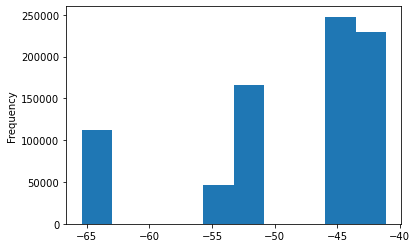

In [402]:
calculation_table_new['perc_percentage'].plot(kind='hist')

In [405]:
calculation_table_new['perc_percentage'] = calculation_table_new['perc_percentage']*-1

In [406]:
calculation_table_new['perc_percentage'] = calculation_table_new['perc_percentage'].replace(-0.0,0.0)

In [419]:
calculation_table_new['perc_percentage'] = calculation_table_new['perc_percentage']/100

<AxesSubplot:ylabel='Frequency'>

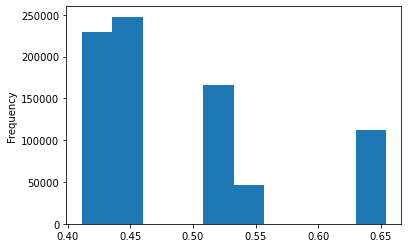

In [420]:
calculation_table_new['perc_percentage'].plot(kind='hist')

In [423]:
calculation_table_new['perc_percentage'].value_counts()

0.4545    247638
0.4111    229145
0.5150    165753
0.6541    112671
0.5536     46031
Name: perc_percentage, dtype: int64

In [ ]:
#before 
'''
calculation_table['risk_factor'].describe()
count    459285.000000
mean         -0.398944
std           0.117510
min          -0.758182
25%          -0.500000
50%          -0.386364
75%          -0.332727
max          -0.113636
Name: risk_factor, dtype: float64
'''

In [425]:
#calculation prec riskscore
#calculation_table['prec_risk']=calculation_table.apply(lambda x : prec_sc(x['perc_percentage']) , axis=1)
calculation_table_new['prec_risk'] = calculation_table_new['perc_percentage']

In [426]:
#to do: automatize this so you only need to add the columns to the list or something
#MASSIVE TO DO DEFAULT VALUES FOR NAN IN DRGHT_RISK AND WTLGG_RISK
#todo check ['seal_risk_score']
#MASSIVE TO DO check the calculations 
#MASSIVE TO DO check the data loading and mapping --> why are 200k values missing even though the mapping seems ok 

#risk items so far
# drght_risk
# wtlgg_risk
# nut_risk
# comp_risk_score 
# seal_risk_score (we need to look at this one again)
# temp_risk_score
# soil_heat_risk_score
# pH_risk
# heat_vuln_risk
# soil_dem_risk
# cont_risk
# prec_risk


risk_items = [  'drght_risk',
                'wtlgg_risk_norm', 
                'nut_risk_norm', 
                'comp_risk_score_norm', 
                'seal_risk_score', 
                'temp_risk_score', 
                'soil_heat_risk_score', 
                'pH_risk', 
                'heat_vuln_risk_norm',
                'soil_dem_risk',
                'prec_risk']

calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'] +
                                    calculation_table_new['seal_risk_score'] +
                                    calculation_table_new['temp_risk_score'] +
                                    calculation_table_new['soil_heat_risk_score'] +
                                    calculation_table_new['pH_risk'] +
                                    calculation_table_new['heat_vuln_risk_norm'] +
                                    calculation_table_new['soil_dem_risk'] +
                                    calculation_table_new['prec_risk']
                                    )/(len(risk_items))


In [ ]:
#after
'''
calculation_table['risk_factor'].describe()
count    459285.000000
mean         -0.416117
std           0.108300
min          -0.757500
25%          -0.500000
50%          -0.403333
75%          -0.354167
max          -0.166667
Name: risk_factor, dtype: float64
'''

In [ ]:
# now calculating percentage_days_diff  --> prec_day_diff
'''
risk score will be calculated as follows:
IF 0 to -25% THEN risk = -0.1
IF -25 to -50% THEN risk = -0.5
IF -50 to -75% THEN risk = -0.75
IF -75 to -100% THEN risk = -1
'''


In [428]:
calculation_table_new['perc_percentage_days_diff'].unique()

array([-21.95, -43.9 , -54.76, -53.66, -46.51])

In [ ]:
#calculation_table['perc_percentage_days_diff'].mean()
#-40.90997512706826

In [429]:
calculation_table_new['perc_percentage_days_diff'].isnull().value_counts()
#False    601055
#True     200231
#Name: perc_percentage_days_diff, dtype: int64

#will use the mean as value for NaNs

False    801238
Name: perc_percentage_days_diff, dtype: int64

In [ ]:
#replacing NaNs with Mean -40.91
#calculation_table['perc_percentage_days_diff'] = calculation_table['perc_percentage_days_diff'].fillna(-40.91)

In [430]:
calculation_table_new['perc_percentage_days_diff'] = calculation_table_new['perc_percentage_days_diff'].astype(float)

In [ ]:
# categorizing precipitation risk 
def prec_days_sc(x):
    if x<=0 and x>-25:
        return -0.1
    elif x<=-25 and x>-50:
        return -0.5
    elif x<=-50 and x>-75:
        return -0.75
    elif x<=-75 and x>=-100:
        return -1
    else:
        return

In [ ]:
#calculation prec days riskscore
calculation_table['prec_days_risk']=calculation_table.apply(lambda x : prec_days_sc(x['perc_percentage_days_diff']) , axis=1)

In [432]:
calculation_table_new['perc_percentage_days_diff'] = calculation_table_new['perc_percentage_days_diff']/-100

<AxesSubplot:ylabel='Frequency'>

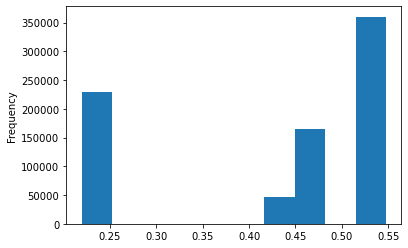

In [433]:
calculation_table_new['perc_percentage_days_diff'].plot(kind='hist')

In [434]:

calculation_table_new['prec_days_risk'] = calculation_table_new['perc_percentage_days_diff']

In [ ]:
#before
'''
calculation_table['risk_factor'].describe()
count    459285.000000
mean         -0.416117
std           0.108300
min          -0.757500
25%          -0.500000
50%          -0.403333
75%          -0.354167
max          -0.166667
Name: risk_factor, dtype: float64
'''

In [491]:
#to do: automatize this so you only need to add the columns to the list or something
#MASSIVE TO DO DEFAULT VALUES FOR NAN IN DRGHT_RISK AND WTLGG_RISK
#todo check ['seal_risk_score']
#MASSIVE TO DO check the calculations 
#MASSIVE TO DO check the data loading and mapping --> why are 200k values missing even though the mapping seems ok 

#risk items so far
# drght_risk
# wtlgg_risk
# nut_risk
# comp_risk_score 
# seal_risk_score (we need to look at this one again)
# temp_risk_score
# soil_heat_risk_score
# pH_risk
# heat_vuln_risk
# soil_dem_risk
# cont_risk
# prec_risk
# prec_days_risk


risk_items = [  'drght_risk',
                'wtlgg_risk_norm', 
                'nut_risk_norm', 
                'comp_risk_score_norm', 
                'seal_risk_score', 
                'temp_risk_score', 
                'soil_heat_risk_score', 
                'pH_risk', 
                'heat_vuln_risk_norm',
                'soil_dem_risk',
                'prec_risk',
                'prec_days_risk']

calculation_table_new['risk_score'] = (calculation_table_new['drght_risk'] + 
                                    calculation_table_new['wtlgg_risk_norm'] + 
                                    calculation_table_new['nut_risk_norm'] +
                                    calculation_table_new['comp_risk_score_norm'] +
                                    calculation_table_new['seal_risk_score'] +
                                    calculation_table_new['temp_risk_score'] +
                                    calculation_table_new['soil_heat_risk_score'] +
                                    calculation_table_new['pH_risk'] +
                                    calculation_table_new['heat_vuln_risk_norm'] +
                                    calculation_table_new['soil_dem_risk'] +
                                    calculation_table_new['prec_risk'] +
                                    calculation_table_new['prec_days_risk']
                                    )/(len(risk_items))


In [492]:
calculation_table_new['risk_score'].describe()

count    693732.000000
mean          0.375603
std           0.101298
min           0.135883
25%           0.302550
50%           0.379217
75%           0.453392
max           0.723603
Name: risk_score, dtype: float64

In [ ]:
#after
'''
calculation_table['risk_factor'].describe()
count    459285.000000
mean         -0.420678
std           0.101745
min          -0.756154
25%          -0.500000
50%          -0.416154
75%          -0.353846
max          -0.161538
Name: risk_factor, dtype: float64
'''

In [493]:
calculation_table.columns.sort_values()

Index(['anspueche_an_den_boden', 'art_bot', 'art_dtsch', 'baum_id', 'boden_id',
       'bodenverdichtungstoleranz_werte', 'diff_t_max', 'diff_t_ran',
       'diff_t_soil', 'diff_temp_score', 'drght_res', 'fl_abs', 'fl_abs_cm',
       'gw_id', 'hitzeempfindlichkeit_werte', 'hitzevertraeglichkeit_werte',
       'ht_night_akt', 'ht_night_ljm', 'kf', 'kontinentalitaet', 'ld',
       'lor_id', 'naehrstoffanspruch_werte', 'naerbew', 'nutr_req',
       'pH-milieu_sensibel_werte', 'pH_max', 'pH_min', 'per_t_soil',
       'perc_days_diff', 'perc_diff', 'perc_percentage',
       'perc_percentage_days_diff', 'ph_soil', 'rain_id', 'soil_id',
       'staunaessetoleranz_werte', 'tr_night_akt', 'tr_night_ljm',
       'trockentoleranz_werte', 'typ', 'versiegelungstoleranz_werte', 'vg',
       'vgstrasse', 'wetter_id', 'wtlgg_res', 'wurzelsystem_werte'],
      dtype='object')

In [437]:
#please check --> mean of akt is 0.0 
calculation_table_new[['tr_night_akt', 'tr_night_ljm']]

,tr_night_akt,tr_night_ljm
0,0,0.02
1,0,0.02
2,0,0.02
3,0,0.02
4,0,0.02
...,...,...
801233,0,0.02
801234,0,0.02
801235,0,0.02
801236,0,0.00


In [494]:
calculation_table_new['risk_score'].describe()

count    693732.000000
mean          0.375603
std           0.101298
min           0.135883
25%           0.302550
50%           0.379217
75%           0.453392
max           0.723603
Name: risk_score, dtype: float64

<AxesSubplot:ylabel='Frequency'>

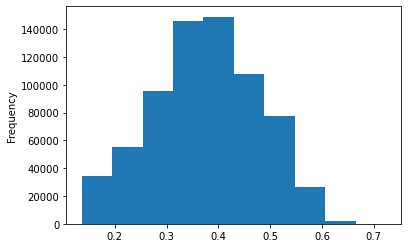

In [495]:
calculation_table_new['risk_score'].plot(kind='hist')

In [496]:
column = 'risk_score'
calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].min()) / (calculation_table_new[column].max() - calculation_table_new[column].min())	
#calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].mean()) / calculation_table_new[column].std()   

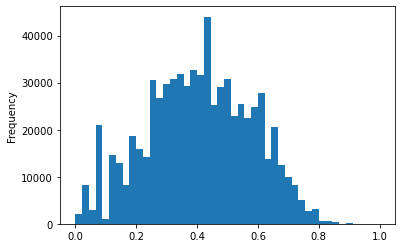

In [497]:
calculation_table_new['risk_score_norm'].plot(kind='hist', bins=45);

In [498]:
calculation_table_new['risk_score_weighted'] = ((calculation_table_new['drght_risk'] * 10)+ 
                                            (calculation_table_new['wtlgg_risk_norm'] * 5) + 
                                            (calculation_table_new['nut_risk_norm'] * 5)+
                                            (calculation_table_new['comp_risk_score_norm'] * 5) +
                                            (calculation_table_new['seal_risk_score'] * 5) +
                                            (calculation_table_new['temp_risk_score'] * 10) +
                                            (calculation_table_new['soil_heat_risk_score'] * 10) +
                                            (calculation_table_new['pH_risk'] * 5) +
                                            (calculation_table_new['heat_vuln_risk_norm']* 5) +
                                            (calculation_table_new['soil_dem_risk'] * 5) +
                                            (calculation_table_new['cont_risk'] * 5) +
                                            (calculation_table_new['prec_risk'] * 15)+
                                            (calculation_table_new['prec_days_risk'] * 15)
                                            )/(len(risk_items)*10)

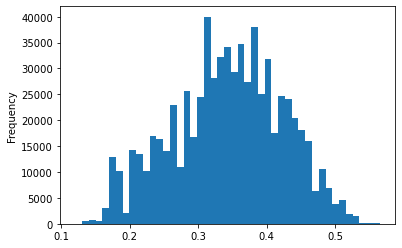

In [499]:
calculation_table_new['risk_score_weighted'].plot(kind='hist', bins=45);

In [500]:
column = 'risk_score_weighted'
calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].min()) / (calculation_table_new[column].max() - calculation_table_new[column].min())	
#calculation_table_new[column+'_norm'] = (calculation_table_new[column] - calculation_table_new[column].mean()) / calculation_table_new[column].std()   

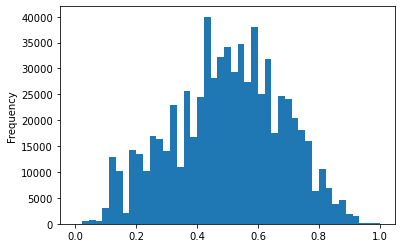

In [501]:
calculation_table_new['risk_score_weighted_norm'].plot(kind='hist', bins=45);

In [502]:
calculation_table_new['risk_score_weighted_norm'].median()

0.5101267676166629

In [504]:
calculation_table_new[['risk_score', 'risk_score_weighted', 'risk_score_weighted_norm']].describe()

,risk_score,risk_score_weighted,risk_score_weighted_norm
count,693732.000000,693732.000000,693732.000000
mean,0.375603,0.343474,0.501421
std,0.101298,0.080782,0.181654
min,0.135883,0.120492,0.000000
25%,0.302550,0.287158,0.374783
50%,0.379217,0.347346,0.510127
75%,0.453392,0.405492,0.640879
max,0.723603,0.565193,1.000000


In [505]:
calculation_table_new.to_csv('data/analysis/final/calc_table_final_stand_11_42_11_sep.csv')

In [ ]:
test = calculation_table[['baum_id', 'lor_id', 'risk_factor', 'risk_factor_weighted']]

In [ ]:
test.to_csv('data/cleaned/test_output.csv')

In [ ]:
testq = test.query('lor_id==455')

In [ ]:
test_test_test = pd.read_csv('data/cleaned/calc_table_stand_00_56_5_sep.csv', index_col=0)